___
NLP YELP REVIEW PROJECT
___

# Natural Language Processing Project 

In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure, since I will utilize the pipeline methods for more complex tasks.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


## Imports

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk

## The Data

In [2]:
yelp = pd.read_csv("yelp.csv")

Check the head, info , and describe methods on yelp.

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp["text length"] = yelp["text"].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Some preliminary analysis to familiarize myself with the data

## Imports

In [19]:
import seaborn as sns 
%matplotlib inline

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.** 

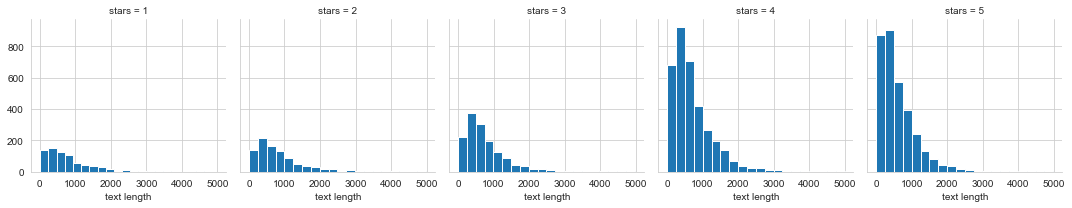

In [14]:
sns.set_style("whitegrid")
x = sns.FacetGrid(data = yelp, col = "stars")
x.map(plt.hist,"text length",bins = 20)

Take a note of the above graphs which compare the text length for each star rating. We can somewhat see that as as the text length increases, the number of reviews start to decrease. 

**Creating a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

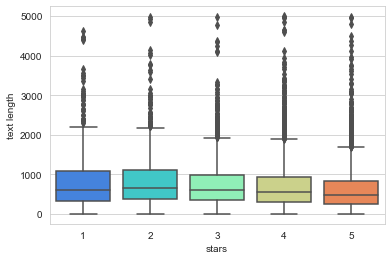

In [112]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Creating a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

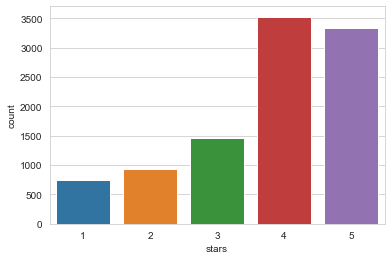

In [114]:
sns.countplot(data = yelp, x = "stars")

**Using groupby to get the mean values of the numerical columns**

In [27]:
yelp.groupby("stars").mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on that groupby dataframe to produce the following dataframe:**

In [28]:
yelp.groupby("stars").mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Finally, using seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

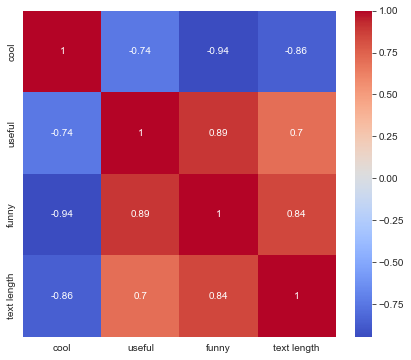

In [45]:
fig = plt.figure(figsize = (7,6))
sns.heatmap(data = yelp.groupby("stars").mean().corr(), annot= True, cmap = "coolwarm")

Take a note of the heatmap above. It shows that the correlation between the word "funny" and "useful" is the highest at 0.89 on the scale of 0 to 1.

## NLP Classification Task

**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [118]:
yelp_class_1 = yelp[yelp["stars"] < 2]
yelp_class.head()
yelp_class_5 = yelp[yelp["stars"] > 4]
yelp_class = pd.concat([yelp_class_1,yelp_class_5], axis = 0)
yelp_class.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0,461


**X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class.**

In [119]:
X = yelp_class['text']
y = yelp_class['stars']

**Importing CountVectorizer and create a CountVectorizer object.**

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Using the fit_transform method on the CountVectorizer object and pass in X (the 'text' column).

In [121]:
X = cv.fit_transform(X)

## Train Test Split

** Using train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

## Training a Model

** I will be using the MultinomialNB; creating an instance of the estimator and call is nb **

In [124]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [125]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

In [127]:
predictions = nb.predict(X_test)
type(predictions)
print(predictions[:20])

[5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1]


** Creating a confusion matrix and classification report using these predictions and y_test **

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[159  70]
 [ 16 981]]
              precision    recall  f1-score   support

           1       0.91      0.69      0.79       229
           5       0.93      0.98      0.96       997

    accuracy                           0.93      1226
   macro avg       0.92      0.84      0.87      1226
weighted avg       0.93      0.93      0.93      1226



** As we can see, the model predicted the values with 93% accuracy and a mean precision of 92%, which is not bad! The number of 
false positives is 70 and false negatives is 16 according to the confusion matrix.

# Using Text Processing

Using Tfidf Transformer >

In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

A pipeline in Python is a way to chain multiple steps of a machine learning workflow together.

In [103]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [104]:
pipeline = Pipeline([("bow",CountVectorizer()),
                    ("tfidf",TfidfTransformer()),
                    ("classifier",MultinomialNB())])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [105]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [106]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [110]:
pred = pipeline.predict(X_test)
print(pred[:5])

[5 5 5 5 5]


In [111]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0 229]
 [  0 997]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       229
           5       0.81      1.00      0.90       997

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\varun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! The accuracy of the CountVectorizer() method was greater than the Tfidf method.

# Conclusion: Model predicted the rating based on text with 93% accuracy using the countvectorizer() method!

---------------------------------------*-------------------------------------------*----------------------------------------